In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df_initial = pd.read_csv("listings.csv")

In [5]:
pd.options.display.max_columns = len(df_initial.columns)


In [6]:
df_initial.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20240610194847,2024-06-11,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, Canada","I live in Vancouver, Canada with my husband an...",NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,Commercial Drive,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Little Portugal,NaN,43.64590,-79.42423,Entire home,Entire home/apt,10,NaN,3 baths,5.0,NaN,"[""Indoor fireplace"", ""Smoke alarm"", ""Fire exti...",NaN,28,730,28,28,730,730,28.0,730.0,NaN,t,0,0,0,0,2024-06-11,6,0,0,2015-07-19,2017-08-07,5.00,5.00,5.00,5.00,5.00,5.00,5.00,NaN,f,1,1,0,0,0.06
1,146601,https://www.airbnb.com/rooms/146601,20240610194847,2024-06-11,city scrape,Modern 1BR Downtown - Blue Jays Way,Comfortable unit with everything you'll need f...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,436139,https://www.airbnb.com/users/show/436139,Brian,2011-03-11,"Los Angeles, CA","Traveling Product Designer, currently adventur...",within a day,100%,0%,f,https://a0.muscache.com/im/users/436139/profil...,https://a0.muscache.com/im/users/436139/profil...,Entertainment District,1.0,3.0,"['email', 'phone']",t,t,NaN,Waterfront Communities-The Island,NaN,43.64584,-79.39051,Entire condo,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Elevator"", ""Free parking on premises"", ""Wash...",$100.00,28,1125,28,28,1125,1125,28.0,1125.0,NaN,t,0,0,0,19,2024-06-11,8,0,0,2011-07-11,2021-09-30,4.71,4.75,4.13,4.75,4.63,5.00,4.38,STR-2303-FPCPHQ,f,1,1,0,0,0.05
2,8077,https://www.airbnb.com/rooms/8077,20240610194847,2024-06-11,previous scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Canada",My husband and I have been airbnb host for alm...,NaN,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,Harbourfront,2.0,3.0,"['email', 'phone']",t,f,NaN,Waterfront Communities-The Island,NaN,43.64080,-79.37673,Private room in rental unit,Private room,2,NaN,1.5 baths,NaN,NaN,"[""Pool"", ""TV with standard cable"", ""Smoke alar...",NaN,180,365,180,180,365,365,180.0,365.0,NaN,NaN,0,0,0,0,2024-06-11,169,0,0,2009-08-20,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,NaN,f,2,1,1,0,0.94


In [7]:
df_initial.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

# Data Cleaning

In [91]:
df = df_initial.copy()

In [ ]:
import pandas as pd
import numpy as np

# 1. Handle Missing Values

# Drop columns with more than 50% missing values
threshold = 0.5 * len(df)
df_cleaned = df.dropna(thresh=threshold, axis=1)

# Impute missing values for numerical features with median
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

# Impute missing values for categorical features with the most frequent value
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[cat_cols] = df_cleaned[cat_cols].fillna(df_cleaned[cat_cols].mode().iloc[0])

# 2. Remove Duplicates
df_cleaned = df_cleaned.drop_duplicates()

# 3. Handle Outliers
# Assuming 'price' is a key feature where outliers are common
# Remove outliers using the Interquartile Range (IQR) method for 'price'

Q1 = df_cleaned['price'].quantile(0.25)
Q3 = df_cleaned['price'].quantile(0.75)
IQR = Q3 - Q1
outlier_threshold = 1.5 * IQR

df_cleaned = df_cleaned[~((df_cleaned['price'] < (Q1 - outlier_threshold)) |
                          (df_cleaned['price'] > (Q3 + outlier_threshold)))]

# 4. Standardize Column Names
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(' ', '_')

# 5. Fix Data Types
# Example: Convert 'host_response_rate' and 'price' to numerical by removing '%' and '$'
df_cleaned['host_response_rate'] = df_cleaned['host_response_rate'].str.rstrip('%').astype(float)
df_cleaned['price'] = df_cleaned['price'].replace('[\$,]', '', regex=True).astype(float)

# 6. Extract Numerical Data from Text Columns
# Example: Convert 'bathrooms_text' to numerical by extracting the first digit
df_cleaned['bathrooms_text'] = df_cleaned['bathrooms_text'].str.extract('(\d+\.?\d*)').astype(float)

# 7. Date Parsing
# Convert 'first_review' and 'last_review' to datetime format
df_cleaned['first_review'] = pd.to_datetime(df_cleaned['first_review'], errors='coerce')
df_cleaned['last_review'] = pd.to_datetime(df_cleaned['last_review'], errors='coerce')

# 8. Remove Irrelevant Columns
# Drop columns that are not useful for analysis (e.g., URLs, IDs)
cols_to_drop = ['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'host_id', 'host_url', 'picture_url']
df_cleaned = df_cleaned.drop(columns=cols_to_drop)

# Final Cleaned DataFrame
print(df_cleaned.info())


In [92]:
df.shape

(21115, 75)

In [93]:
 # 1. Handle Missing Values

# Drop columns with more than 50% missing values
threshold = 0.5 * len(df)
df_cleaned = df.dropna(thresh=threshold, axis=1)

In [94]:
df_cleaned.shape

(21115, 70)

In [27]:
# None Column is deleted


In [95]:
# Check for missing values in each column
missing_values = df.isnull().sum()

# Display missing values
print("Missing values in each column:\n", missing_values)

# To show the percentage of missing values for each column
missing_percentage = (missing_values / len(df)) * 100

# Display percentage of missing values
print("\nPercentage of missing values in each column:\n", missing_percentage)

Missing values in each column:
 id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               5438
Length: 75, dtype: int64

Percentage of missing values in each column:
 id                                               0.000000
listing_url                                      0.000000
scrape_id                                        0.000000
last_scraped                                     0.000000
source                                           0.000000
                       

In [96]:
df_cleaned.shape

(21115, 70)

In [97]:
# Impute missing values for numerical features with median
num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned.loc[:, num_cols] = df_cleaned[num_cols].fillna(df_cleaned[num_cols].median())

In [98]:
df_cleaned.shape

(21115, 70)

In [99]:
# Impute missing values for categorical features with the most frequent value
cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned.loc[:, cat_cols] = df_cleaned[cat_cols].fillna(df_cleaned[cat_cols].mode().iloc[0])

In [100]:
df_cleaned.shape

(21115, 70)

In [104]:
# Convert 'first_review' and 'last_review' to datetime format
df_cleaned.loc[:, 'first_review'] = pd.to_datetime(df_cleaned['first_review'], errors='coerce')
df_cleaned.loc[:, 'last_review'] = pd.to_datetime(df_cleaned['last_review'], errors='coerce')

# Drop rows with NaT values in 'first_review' or 'last_review'
df_cleaned = df_cleaned.dropna(subset=['first_review', 'last_review'])

# Calculate the difference in years
df_cleaned.loc[:, 'review_period_years'] = df_cleaned['last_review'].dt.year - df_cleaned['first_review'].dt.year

# Display the result
print(df_cleaned[['first_review', 'last_review', 'review_period_years']].head())

  first_review last_review  review_period_years
0   2015-07-19  2017-08-07                  2.0
1   2011-07-11  2021-09-30                 10.0
2   2009-08-20  2013-08-27                  4.0
3   2023-04-30  2024-05-27                  1.0
4   2011-08-26  2023-04-30                 12.0


In [105]:
df_cleaned.shape

(21115, 71)

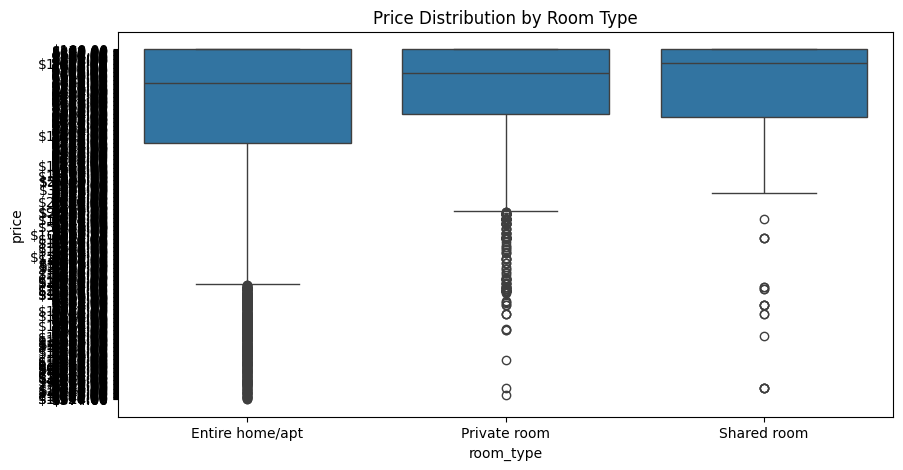

In [107]:
# Outliers
# Box plot to identify outliers
plt.figure(figsize=(10, 5))
sns.boxplot(x='room_type', y='price', data=df_cleaned)
plt.title('Price Distribution by Room Type')
plt.show()

In [108]:

# 4. Standardize Column Names
df_cleaned.columns = df_cleaned.columns.str.lower().str.replace(' ', '_')

In [109]:
df_cleaned.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability

In [111]:
import pandas as pd
import numpy as np

# Assuming df_cleaned is your DataFrame

# List of columns that should be numerical
numerical_cols = [
    'host_response_rate', 'host_acceptance_rate', 'host_listings_count',
    'host_total_listings_count', 'latitude', 'longitude', 'accommodates',
    'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
    'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
    'minimum_maximum_nights', 'maximum_maximum_nights',
    'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm',
    'availability_30', 'availability_60', 'availability_90',
    'availability_365', 'number_of_reviews', 'number_of_reviews_ltm',
    'number_of_reviews_l30d', 'review_scores_rating',
    'review_scores_accuracy', 'review_scores_cleanliness',
    'review_scores_checkin', 'review_scores_communication',
    'review_scores_location', 'review_scores_value',
    'calculated_host_listings_count', 
    'calculated_host_listings_count_entire_homes',
    'calculated_host_listings_count_private_rooms',
    'calculated_host_listings_count_shared_rooms', 
    'reviews_per_month', 'review_period_years'
]

# Function to clean and convert numerical columns
def clean_numerical_columns(df, columns):
    for column in columns:
        if column in df.columns:
            # Convert the column to string, strip unwanted characters, and then convert to numeric
            df[column] = (
                df[column]
                .astype(str)                        # Ensure the column is treated as string
                .replace('[\$,]', '', regex=True)  # Remove $ or other symbols
                .str.strip()                        # Strip leading/trailing whitespace
            )
            df[column] = pd.to_numeric(df[column], errors='coerce')  # Convert to numeric
            
    return df

# Clean the numerical columns in the DataFrame
df_cleaned = clean_numerical_columns(df_cleaned, numerical_cols)

# Display the result
print(df_cleaned[numerical_cols].info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21115 entries, 0 to 21114
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   host_response_rate                            0 non-null      float64
 1   host_acceptance_rate                          0 non-null      float64
 2   host_listings_count                           21115 non-null  float64
 3   host_total_listings_count                     21115 non-null  float64
 4   latitude                                      21115 non-null  float64
 5   longitude                                     21115 non-null  float64
 6   accommodates                                  21115 non-null  int64  
 7   bathrooms                                     21115 non-null  float64
 8   bedrooms                                      21115 non-null  float64
 9   beds                                          21115 non-null 

In [112]:
df_cleaned.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_period_years
0,1419,https://www.airbnb.com/rooms/1419,20240610194847,2024-06-11,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, Canada",within an hour,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Little Portugal,43.64590,-79.42423,Entire home,Entire home/apt,10,1.0,3 baths,5.0,1.0,"[""Indoor fireplace"", ""Smoke alarm"", ""Fire exti...",100.0,28,730,28,28,730,730,28.0,730.0,t,0,0,0,0,2024-06-11,6,0,0,2015-07-19,2017-08-07,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0,0.06,2.0
1,146601,https://www.airbnb.com/rooms/146601,20240610194847,2024-06-11,city scrape,Modern 1BR Downtown - Blue Jays Way,Comfortable unit with everything you'll need f...,Everything your heart desires is just around t...,https://a0.muscache.com/pictures/miso/Hosting-...,436139,https://www.airbnb.com/users/show/436139,Brian,2011-03-11,"Los Angeles, CA",within a day,NaN,NaN,f,https://a0.muscache.com/im/users/436139/profil...,https://a0.muscache.com/im/users/436139/profil...,1.0,3.0,"['email', 'phone']",t,t,Neighborhood highlights,Waterfront Communities-The Island,43.64584,-79.39051,Entire condo,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Elevator"", ""Free parking on premises"", ""Wash...",100.0,28,1125,28,28,1125,1125,28.0,1125.0,t,0,0,0,19,2024-06-11,8,0,0,2011-07-11,2021-09-30,4.71,4.75,4.13,4.75,4.63,5.00,4.38,f,1,1,0,0,0.05,10.0
2,8077,https://www.airbnb.com/rooms/8077,20240610194847,2024-06-11,previous scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,Everything your heart desires is just around t...,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Canada",within an hour,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,2.0,3.0,"['email', 'phone']",t,f,Neighborhood highlights,Waterfront Communities-The Island,43.64080,-79.37673,Private room in rental unit,Private room,2,1.0,1.5 baths,1.0,1.0,"[""Pool"", ""TV with standard cable"", ""Smoke alar...",100.0,180,365,180,180,365,365,180.0,365.0,t,0,0,0,0,2024-06-11,169,0,0,2009-08-20,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,f,2,1,1,0,0.94,4.0


In [116]:
# Assuming df_cleaned is your DataFrame and 'amenities' is the column of interest

# Count the number of amenities for each row
df_cleaned['amenities_count'] = df_cleaned['amenities'].str.split(',').str.len()

# Display the first few rows to see the count of amenities
print(df_cleaned[['amenities', 'amenities_count']].head())

                                           amenities  amenities_count
0  ["Indoor fireplace", "Smoke alarm", "Fire exti...               13
1  ["Elevator", "Free parking on premises", "Wash...               11
2  ["Pool", "TV with standard cable", "Smoke alar...               10
3  ["Pool", "Hot tub", "Elevator", "Free parking ...               12
4  ["TV with standard cable", "Private gym in bui...               26


In [118]:
df_cleaned.shape

(21115, 72)

In [119]:
df_cleaned.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude',
       'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability

In [120]:
df_cleaned.head(3)

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_period_years,amenities_count
0,1419,https://www.airbnb.com/rooms/1419,20240610194847,2024-06-11,previous scrape,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,Alexandra,2008-08-08,"Vancouver, Canada",within an hour,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/7aeea...,https://a0.muscache.com/im/pictures/user/7aeea...,1.0,1.0,"['email', 'phone']",t,t,Neighborhood highlights,Little Portugal,43.64590,-79.42423,Entire home,Entire home/apt,10,1.0,3 baths,5.0,1.0,"[""Indoor fireplace"", ""Smoke alarm"", ""Fire exti...",100.0,28,730,28,28,730,730,28.0,730.0,t,0,0,0,0,2024-06-11,6,0,0,2015-07-19,2017-08-07,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0,0.06,2.0,13
1,146601,https://www.airbnb.com/rooms/146601,20240610194847,2024-06-11,city scrape,Modern 1BR Downtown - Blue Jays Way,Comfortable unit with everything you'll need f...,Everything your heart desires is just around t...,https://a0.muscache.com/pictures/miso/Hosting-...,436139,https://www.airbnb.com/users/show/436139,Brian,2011-03-11,"Los Angeles, CA",within a day,NaN,NaN,f,https://a0.muscache.com/im/users/436139/profil...,https://a0.muscache.com/im/users/436139/profil...,1.0,3.0,"['email', 'phone']",t,t,Neighborhood highlights,Waterfront Communities-The Island,43.64584,-79.39051,Entire condo,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Elevator"", ""Free parking on premises"", ""Wash...",100.0,28,1125,28,28,1125,1125,28.0,1125.0,t,0,0,0,19,2024-06-11,8,0,0,2011-07-11,2021-09-30,4.71,4.75,4.13,4.75,4.63,5.00,4.38,f,1,1,0,0,0.05,10.0,11
2,8077,https://www.airbnb.com/rooms/8077,20240610194847,2024-06-11,previous scrape,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,Everything your heart desires is just around t...,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,Kathie & Larry,2009-06-22,"Toronto, Canada",within an hour,NaN,NaN,f,https://a0.muscache.com/im/pictures/user/9a077...,https://a0.muscache.com/im/pictures/user/9a077...,2.0,3.0,"['email', 'phone']",t,f,Neighborhood highlights,Waterfront Communities-The Island,43.64080,-79.37673,Private room in rental unit,Private room,2,1.0,1.5 baths,1.0,1.0,"[""Pool"", ""TV with standard cable"", ""Smoke alar...",100.0,180,365,180,180,365,365,180.0,365.0,t,0,0,0,0,2024-06-11,169,0,0,2009-08-20,2013-08-27,4.84,4.81,4.89,4.87,4.90,4.92,4.83,f,2,1,1,0,0.94,4.0,10


In [128]:
# Cleaned list of columns to drop
cols_to_drop = [
    'id',
    'listing_url', 
    'scrape_id', 
    'host_id', 
    'host_url', 
    'picture_url',
    'name',
    'neighborhood_overview',
    'description',
    'host_thumbnail_url', 
    'calendar_last_scraped',
    'amenities',
    'first_review',
    'last_review',
    'host_since',
    'host_name',
    'host_location',
    'host_picture_url',
    'host_total_listings_count',
    'host_has_profile_pic',
    'last_scraped',
    'host_response_rate',
    'host_acceptance_rate',
    'neighbourhood'
]

# Remove the columns from the DataFrame
df_cleaned_new = df_cleaned.drop(columns=cols_to_drop)

# Display the result
print(df_cleaned_new.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21115 entries, 0 to 21114
Data columns (total 49 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   source                                        21115 non-null  object 
 1   host_response_time                            21115 non-null  object 
 2   host_is_superhost                             21115 non-null  object 
 3   host_listings_count                           21115 non-null  float64
 4   host_verifications                            21115 non-null  object 
 5   host_identity_verified                        21115 non-null  object 
 6   neighbourhood                                 21115 non-null  object 
 7   neighbourhood_cleansed                        21115 non-null  object 
 8   latitude                                      21115 non-null  float64
 9   longitude                                     21115 non-null 

In [130]:
df_cleaned_new.shape

(21115, 49)

In [131]:
df_cleaned_new.head()

,source,host_response_time,host_is_superhost,host_listings_count,host_verifications,host_identity_verified,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,review_period_years,amenities_count
0,previous scrape,within an hour,f,1.0,"['email', 'phone']",t,Neighborhood highlights,Little Portugal,43.64590,-79.42423,Entire home,Entire home/apt,10,1.0,3 baths,5.0,1.0,100.0,28,730,28,28,730,730,28.0,730.0,t,0,0,0,0,6,0,0,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,1,1,0,0,0.06,2.0,13
1,city scrape,within a day,f,1.0,"['email', 'phone']",t,Neighborhood highlights,Waterfront Communities-The Island,43.64584,-79.39051,Entire condo,Entire home/apt,3,1.0,1 bath,1.0,1.0,100.0,28,1125,28,28,1125,1125,28.0,1125.0,t,0,0,0,19,8,0,0,4.71,4.75,4.13,4.75,4.63,5.00,4.38,f,1,1,0,0,0.05,10.0,11
2,previous scrape,within an hour,f,2.0,"['email', 'phone']",f,Neighborhood highlights,Waterfront Communities-The Island,43.64080,-79.37673,Private room in rental unit,Private room,2,1.0,1.5 baths,1.0,1.0,100.0,180,365,180,180,365,365,180.0,365.0,t,0,0,0,0,169,0,0,4.84,4.81,4.89,4.87,4.90,4.92,4.83,f,2,1,1,0,0.94,4.0,10
3,previous scrape,within an hour,f,1.0,"['email', 'phone']",f,Neighborhood highlights,Woburn,43.78196,-79.24634,Entire condo,Entire home/apt,4,1.0,1 bath,2.0,1.0,100.0,28,31,28,28,31,31,28.0,31.0,t,0,0,0,0,0,0,0,4.90,4.92,4.88,4.96,4.98,4.93,4.80,f,1,1,0,0,0.63,1.0,12
4,city scrape,within a few hours,f,5.0,"['email', 'phone', 'work_email']",t,Neighborhood highlights,Church-Yonge Corridor,43.67005,-79.38372,Entire rental unit,Entire home/apt,4,1.0,1 bath,2.0,2.0,279.0,180,1125,180,180,1125,1125,180.0,1125.0,t,10,40,70,345,63,0,0,4.93,4.93,4.88,4.78,4.90,4.93,4.83,f,1,1,0,0,0.40,12.0,26


In [140]:
# List of columns to check for unique values
columns_to_check = [
    'host_response_time',
    'host_verifications',
    'neighbourhood_cleansed',
    'property_type',
    'room_type',
    'bathrooms_text',
    'instant_bookable'
]

# Show unique values in the DataFrame
print("Unique values in the DataFrame:")
print('=============================')

# Loop through each column in the list and print unique values
for column in columns_to_check:
    if column in df_cleaned.columns:
        unique_values = df_cleaned[column].unique().tolist()
        print(f"Unique values for '{column}':", unique_values)
        print('=============================')
    else:
        print(f"Column '{column}' not found in DataFrame.")
        print('=============================')


Unique values in the DataFrame:
Unique values for 'host_response_time': ['within an hour', 'within a day', 'within a few hours', 'a few days or more']
Unique values for 'host_verifications': ["['email', 'phone']", "['email', 'phone', 'work_email']", "['phone']", "['phone', 'work_email']", "['email']", "['work_email']", '[]', "['email', 'work_email']"]
Unique values for 'neighbourhood_cleansed': ['Little Portugal', 'Waterfront Communities-The Island', 'Woburn', 'Church-Yonge Corridor', 'South Parkdale', 'Junction Area', 'South Riverdale', 'Oakridge', 'Cabbagetown-South St.James Town', 'Annex', 'The Beaches', 'Caledonia-Fairbank', 'Wexford/Maryvale', 'Rosedale-Moore Park', 'Niagara', 'Casa Loma', 'Bay Street Corridor', 'North St.James Town', 'Blake-Jones', 'High Park North', 'Moss Park', 'Mount Pleasant West', 'Willowdale East', 'Danforth', 'University', 'Thistletown-Beaumond Heights', 'Dovercourt-Wallace Emerson-Junction', 'Palmerston-Little Italy', 'Flemingdon Park', 'East End-Danforth

In [17]:
df_initial['host_verifications']

0                      ['email', 'phone']
1                      ['email', 'phone']
2                      ['email', 'phone']
3                      ['email', 'phone']
4        ['email', 'phone', 'work_email']
                       ...               
21110                           ['phone']
21111                           ['phone']
21112                  ['email', 'phone']
21113                  ['email', 'phone']
21114                           ['phone']
Name: host_verifications, Length: 21115, dtype: object

In [18]:
unique_values = df_initial['host_verifications'].unique()
print(unique_values)

["['email', 'phone']" "['email', 'phone', 'work_email']" "['phone']"
 "['phone', 'work_email']" "['email']" "['work_email']" '[]'
 "['email', 'work_email']" nan]


In [ ]:
colums_list = ['listing_url','scrape_id','name']

In [57]:
df = df_initial.copy()

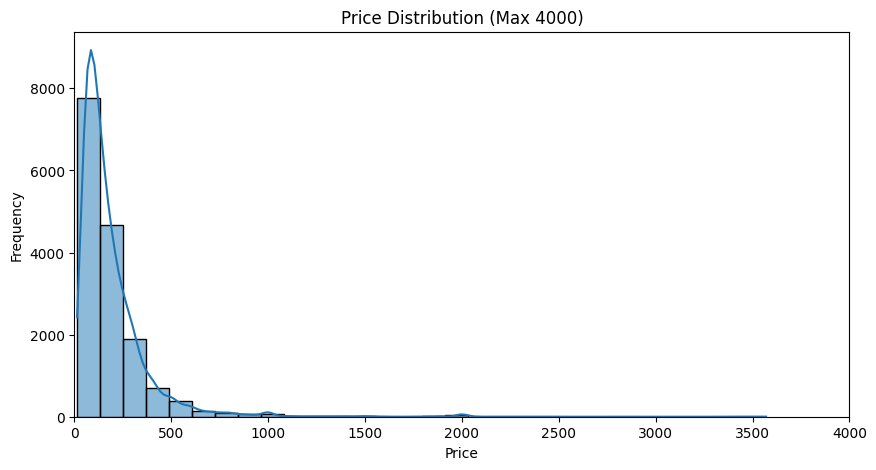

In [24]:
# Histogram for numerical columns
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)  # Clean price column if necessary

# Filter prices to be within the specified range
df_filtered = df[df['price'] <= 4000]

plt.figure(figsize=(10, 5))
sns.histplot(df_filtered['price'], bins=30, kde=True)
plt.xlim(0, 4000)  # Set x-axis limit
plt.title('Price Distribution (Max 4000)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(12, 8))
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

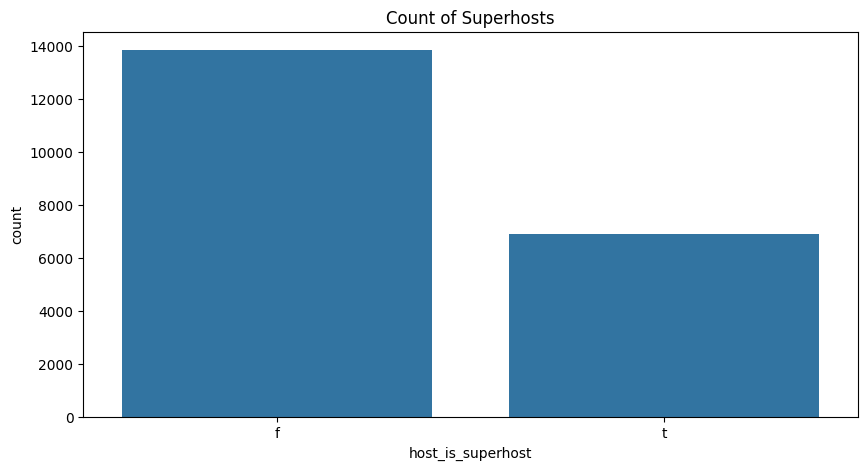

In [29]:
# 5. Categorical Analysis
# Count plot for a categorical feature
plt.figure(figsize=(10, 5))
sns.countplot(x='host_is_superhost', data=df)
plt.title('Count of Superhosts')
plt.show()


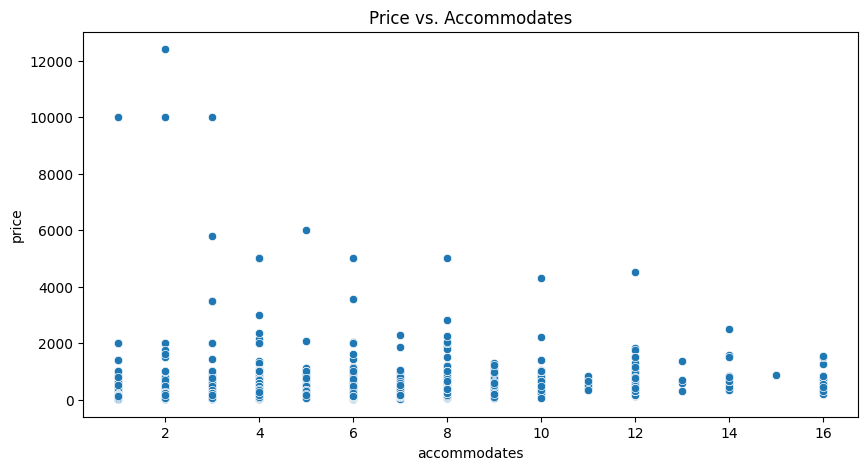

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.scatterplot(x='accommodates', y='price', data=df)
plt.title('Price vs. Accommodates')
plt.show()